# Usage

This notebook provides the steps to build a network starting from a list of genes, and using the Iterative Neighbor Expansion
(INE) algorithm.

In [1]:
%%time
from neko.core.network import Network
from neko._visual.visualize_network import NetworkVisualizer
from neko._inputs.resources import Resources
from neko._annotations.gene_ontology import Ontology
from neko.core.network import is_connected
import omnipath as op
import pandas as pd

CPU times: user 7.05 s, sys: 559 ms, total: 7.61 s
Wall time: 8.97 s


## 1. Define the list of genes of interest

In [2]:
genes = ["PIK3CA","MAP2K1","GSK3B","MAPK14","CTNNB1","AKT1","MAP3K7"]

In [3]:
output_nodes_prosurvival = ['CCND1','MYC','TCF7L2']

## 2. Specify SIGNOR resource

In [4]:
resources = Resources()
resources.import_signor_tsv("all_data_09_07_24.tsv") 

## 3. Create a network using as input the gene set. 


### 3A. Import genes as network nodes

In [5]:
new_net = Network(initial_nodes = genes, resources=resources.interactions)

### 3B. Connect nodes

The INE algorith connects the input nodes by looking and introducing all their immediate neighbors into the network. If the nodes remain unconnected, the immediate neighbors of the newly introduced nodes are added into the network. The process ends either when a complete network is reached or until the user-specified threshold of expansion steps (i.e., `max_len`) is specified.

The algorithm also allows the definition of `outputs`, which are nodes that should be connected to the network with only incoming edges. For instance, these nodes might represent phenotypic markers (e.g., proliferation) of interest.

At the end of the algorithm, any nodes that do not have a source in the edge dataframe and are not in  the output node are removed..

In [6]:
%%time
new_net.connect_as_atopo(max_len=1, strategy="radial",outputs=output_nodes_prosurvival)

CPU times: user 30.7 s, sys: 15.6 ms, total: 30.7 s
Wall time: 30.7 s


In [7]:
new_net.edges

,source,target,Type,Effect,References
0,Q16539,Q15750,None,inhibition,14592977; 19393267
1,Q16539,P42574,None,inhibition,14970175
2,Q16539,P11362,None,inhibition,20626350
3,Q16539,P49841,None,inhibition,18451303; 17726008
4,Q16539,P04150,None,stimulation,20660302; 15817653
...,...,...,...,...,...
189,SIGNOR-PF1,P01106,None,stimulation,11018017
192,P49841,P01106,None,inhibition,14563837; 16023596; 11018017
193,P49841,P24385,None,inhibition,9832503; 16504004; 23552696
210,P27361,P01106,None,stimulation,32482868


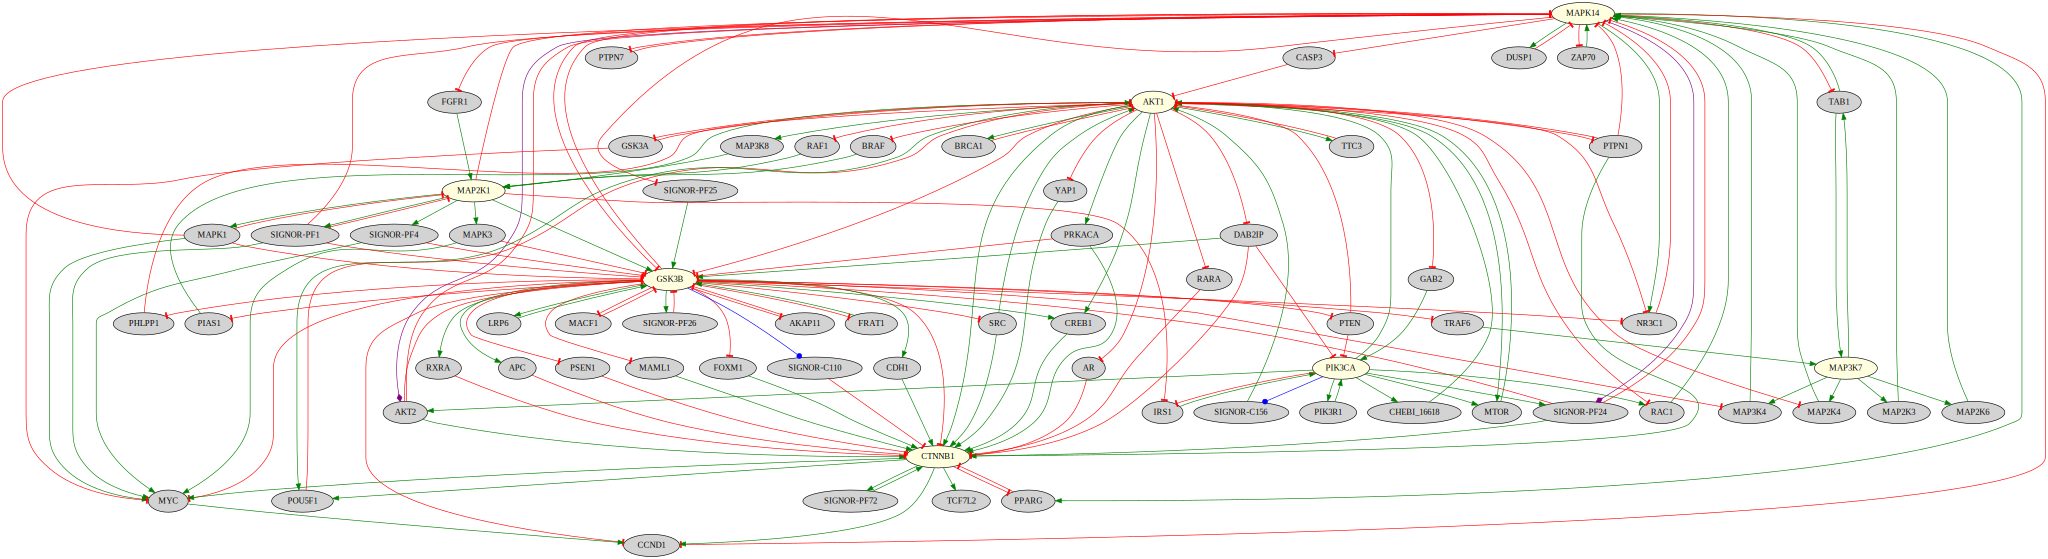

In [8]:
visualizer = NetworkVisualizer(new_net, color_by='effect', noi=True)
visualizer.render()

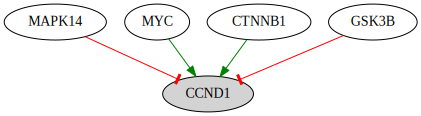

In [9]:
visualizer = NetworkVisualizer(new_net, color_by='effect', noi=True, predefined_node="CCND1")
visualizer.render()